# Exercise 5 : Classification Tree
## Problem 1 : Predicting CentralAir using SalePrice

#### Import the complete dataset “train.csv” in Jupyter : houseData = pd.read_csv('train.csv') 
#### Use the following variables from the dataset in this problem : SalePrice and CentralAir


In [4]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sb.set() 

In [5]:
houseData = pd.read_csv('train.csv')

**a) Plot the distribution of CentralAir to check the imbalance of Y against N. Print the ratio of the classes Y : N.**

Y    1365
N      95
Name: CentralAir, dtype: int64
Ratio of the classes Y:N is 1365:95


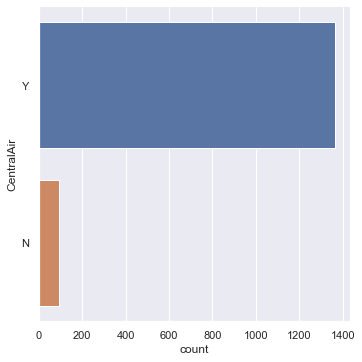

In [6]:
SalePrice = pd.DataFrame(houseData['SalePrice'])
CentralAir = pd.DataFrame(houseData['CentralAir'])
cp = sb.catplot(y = "CentralAir", data = houseData, kind = 'count') #data = CentralAir

x = CentralAir["CentralAir"].value_counts()
print(x)
print("Ratio of the classes Y:N is " + str(x[0]) + ":" + str(x[1]))

**b) Plot CentralAir against SalePrice using any appropriate bivariate plot to note the mutual relationship.**

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

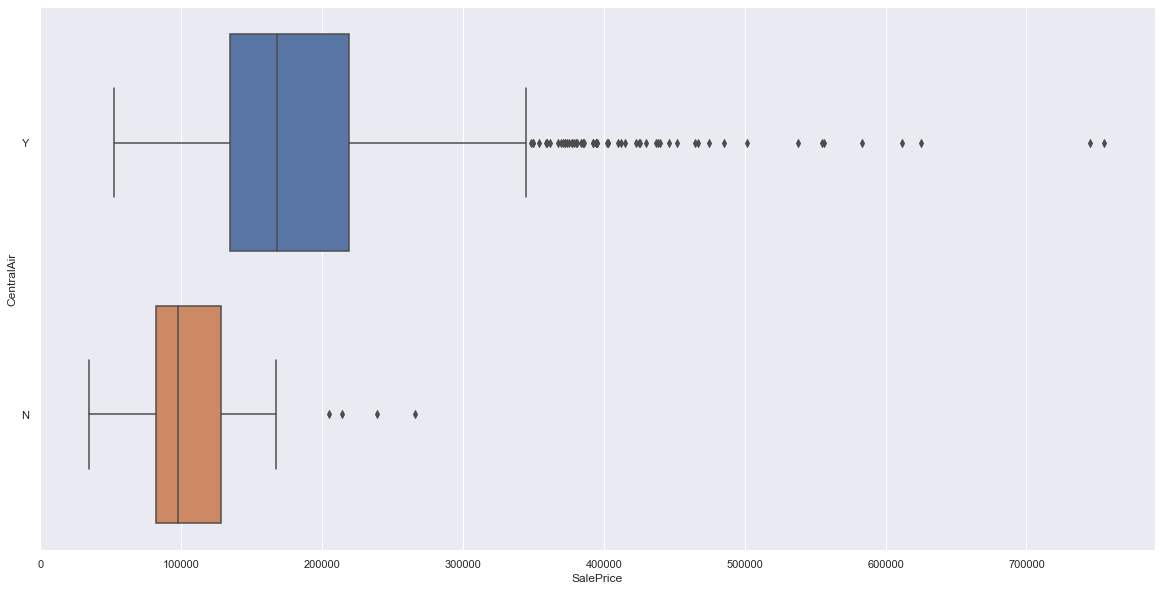

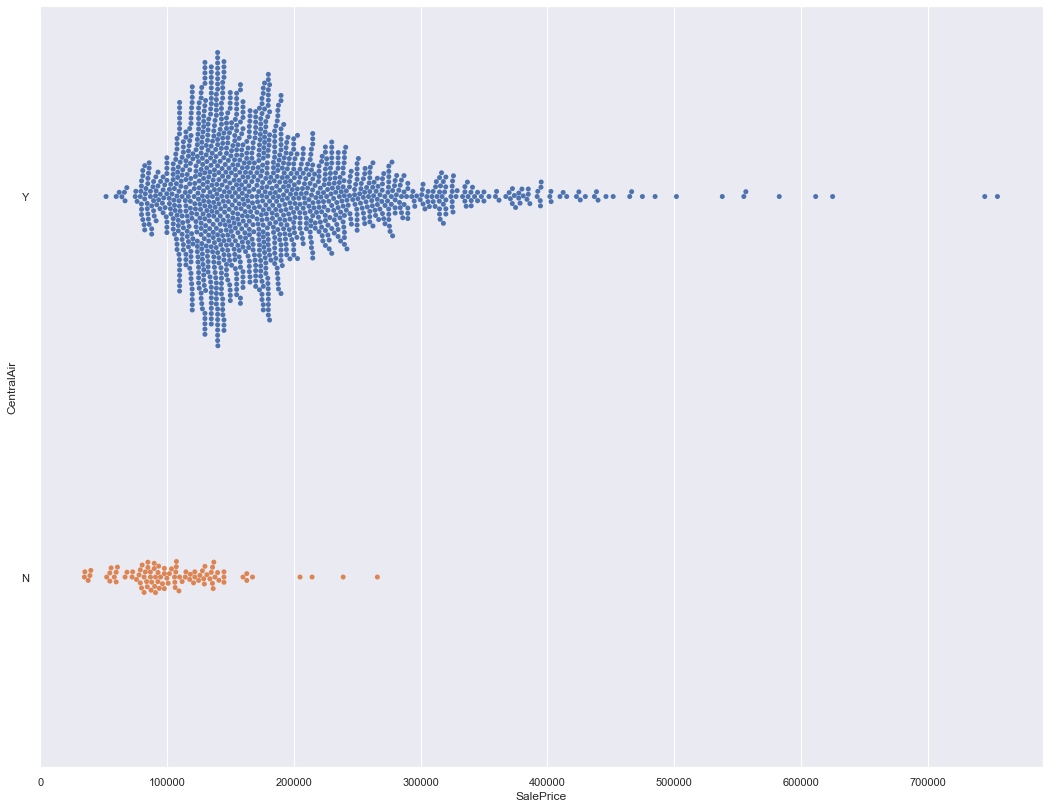

In [7]:
# Create a joint dataframe by concatenating Total and Legendary
target = pd.concat([SalePrice, CentralAir], axis = 1).reindex(SalePrice.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(20, 10))
sb.boxplot(x = "SalePrice", y = "CentralAir", data = target, orient = "h")

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 14))
sb.swarmplot(x = "SalePrice", y = "CentralAir", data = target, orient = "h")

**c) Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier**

In [8]:
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

**d) Partition the dataset houseData into two “random” portions : Train Data (1100 rows) and Test Data (360 rows).**

In [9]:
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(SalePrice, CentralAir, train_size = 1100, test_size = 360)

**e) Training : Fit a Decision Tree model on the Train Dataset to predict the class (Y/N) of CentralAir using SalePrice.**

In [10]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

**f) Visualize the Decision Tree model using the plot_tree function : from sklearn.tree import plot_tree**

[Text(334.8, 543.6, 'SalePrice <= 107700.0\ngini = 0.125\nsamples = 1100\nvalue = [74, 1026]\nclass = Yes'),
 Text(167.4, 326.16, 'SalePrice <= 59250.0\ngini = 0.463\nsamples = 118\nvalue = [43, 75]\nclass = Yes'),
 Text(83.7, 108.72000000000003, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = No'),
 Text(251.10000000000002, 108.72000000000003, 'gini = 0.429\nsamples = 109\nvalue = [34, 75]\nclass = Yes'),
 Text(502.20000000000005, 326.16, 'SalePrice <= 145125.0\ngini = 0.061\nsamples = 982\nvalue = [31, 951]\nclass = Yes'),
 Text(418.5, 108.72000000000003, 'gini = 0.146\nsamples = 302\nvalue = [24, 278]\nclass = Yes'),
 Text(585.9, 108.72000000000003, 'gini = 0.02\nsamples = 680\nvalue = [7, 673]\nclass = Yes')]

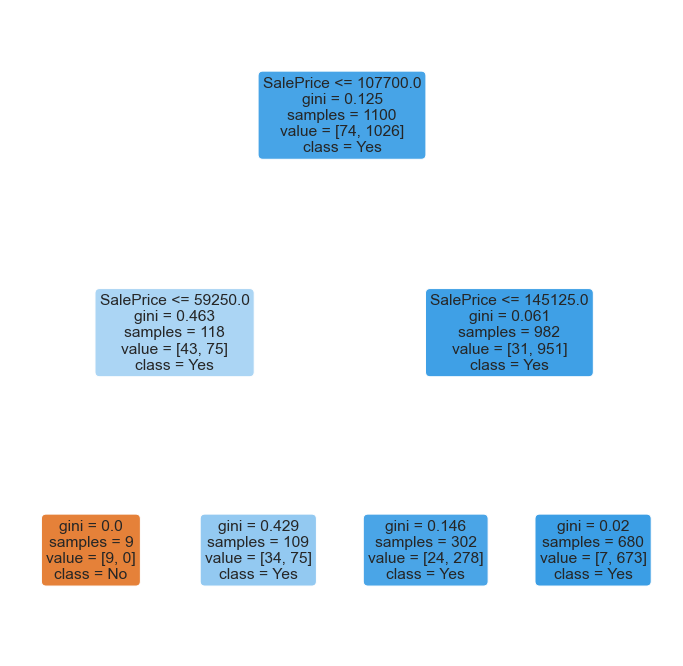

In [11]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree


f = plt.figure(figsize=(12,12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["SalePrice"], 
          class_names=["No","Yes"])

**g) Predict CentralAir for the train dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.**

<AxesSubplot:>

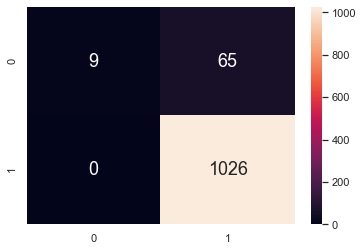

In [12]:
# Predict CentralAir corresponding to SalePrice Train
y_train_pred = dectree.predict(X_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**h) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on train data.**

In [13]:
# Print the Classification Accuracy
print("Classification Accuracy\t:", dectree.score(X_train, y_train))

cm = confusion_matrix(y_train, y_train_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))

Classification Accuracy	: 0.9409090909090909
True positive Rate     	: 1.0
False positive Rate    	: 0.8783783783783784
False negative Rate    	: 0.0
True negative Rate     	: 0.12162162162162163


**i) Predict CentralAir for the test dataset using the Decision Tree model and plot the Two-Way Confusion Matrix.**

<AxesSubplot:>

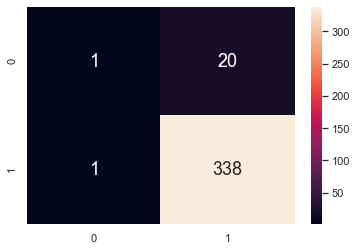

In [14]:
# Predict CentralAir corresponding to SalePrice Test
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

**j) Print accuracy measures of the Decision Tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the confusion matrix on test data.**

In [15]:
# Print the Classification Accuracy
print("Classification Accuracy\t:", dectree.score(X_test, y_test))

cm = confusion_matrix(y_test, y_test_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))

Classification Accuracy	: 0.9416666666666667
True positive Rate     	: 0.9970501474926253
False positive Rate    	: 0.9523809523809523
False negative Rate    	: 0.0029498525073746312
True negative Rate     	: 0.047619047619047616


### Problem 2 : Predicting CentralAir using Other Variables

Perform all the above steps on “CentralAir” against each of the variables “GrLivArea”, “OverallQual”, “YearBuilt”, oneby-
one to perform individual Binary Classifications and obtain individual univariate Decision Tree Models in each case.
Consider all predictor variables “GrLivArea”, “OverallQual”, “YearBuilt” as Numeric in case of this classification problem.

### "GrLivArea"

Y    1365
N      95
Name: CentralAir, dtype: int64
Ratio of the classes Y:N is 1365:95

TRAIN: 
Classification Accuracy	: 0.9336363636363636
True positive Rate     	: 1.0
False positive Rate    	: 0.948051948051948
False negative Rate    	: 0.0
True negative Rate     	: 0.05194805194805195


TEST: 
Classification Accuracy	: 0.95
True positive Rate     	: 1.0
False positive Rate    	: 1.0
False negative Rate    	: 0.0
True negative Rate     	: 0.0



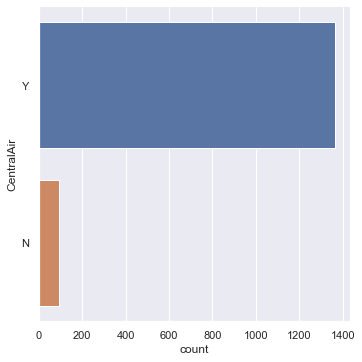

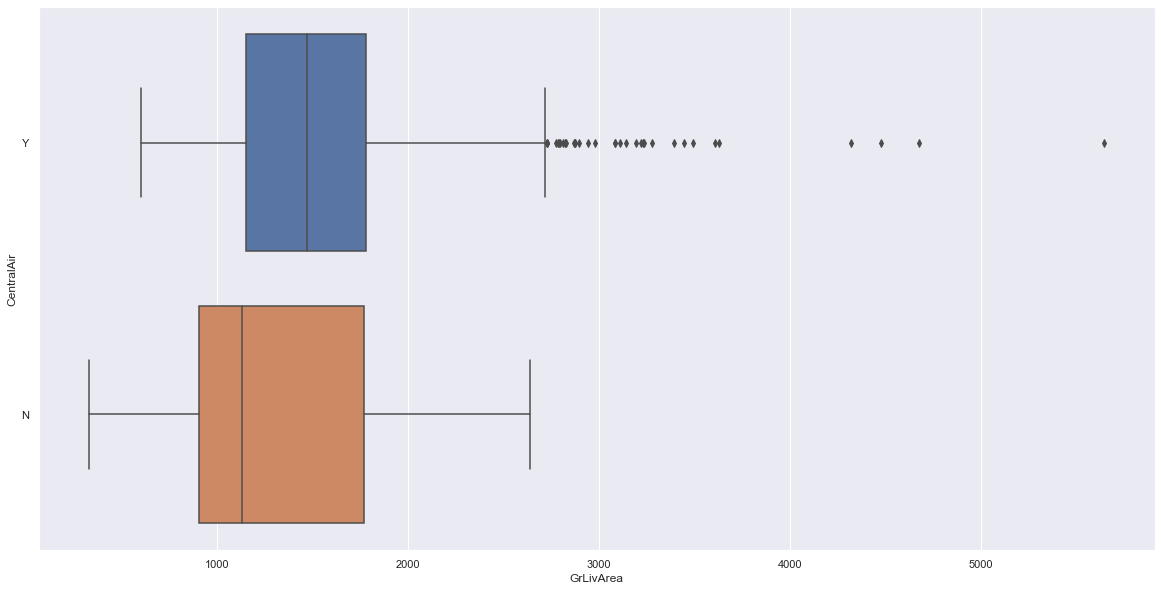

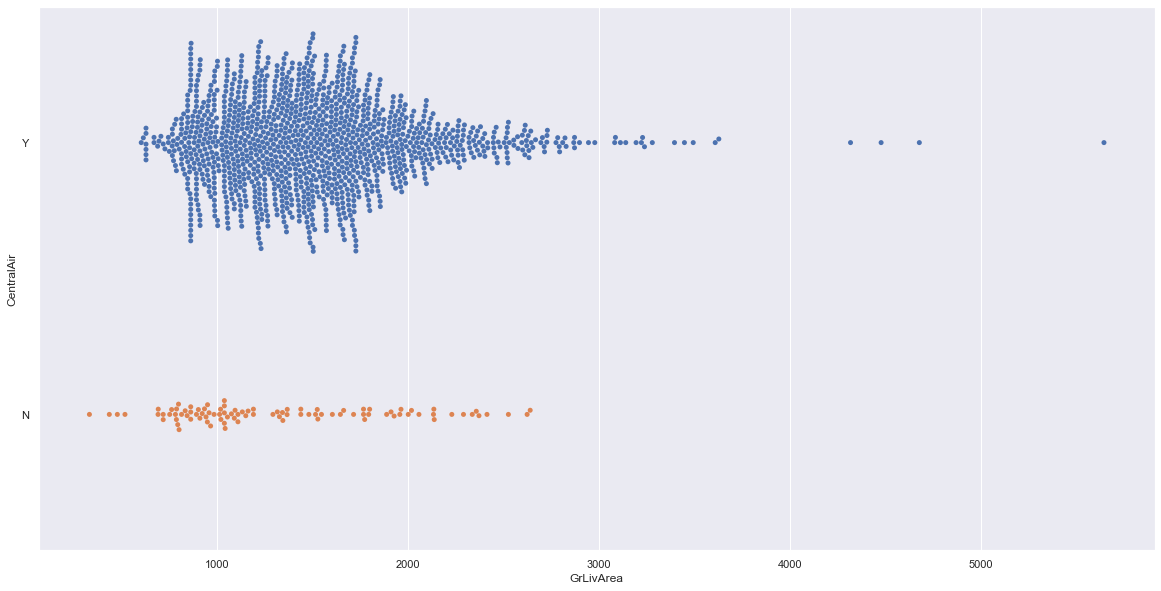

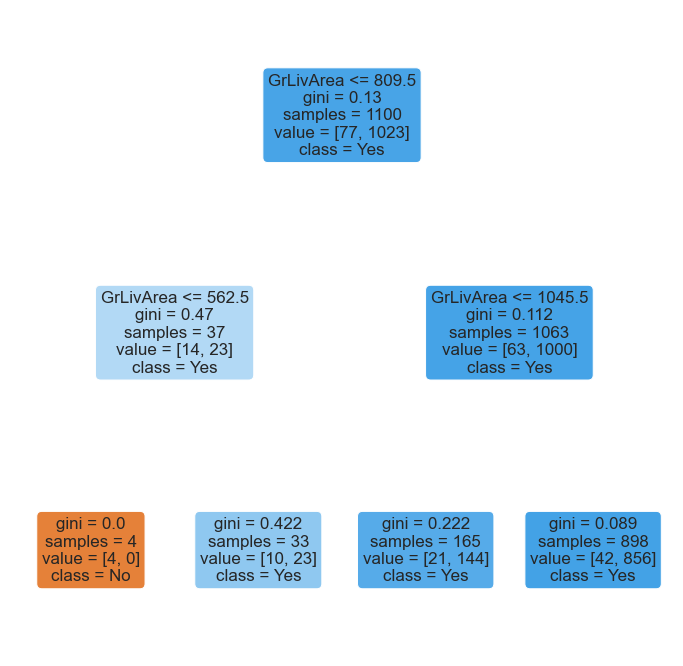

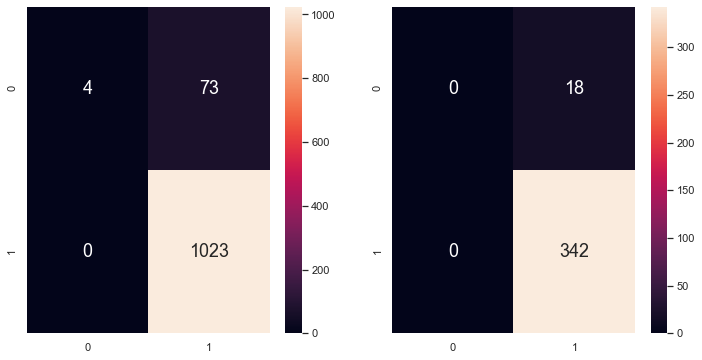

In [16]:
#a
GrLivArea = pd.DataFrame(houseData['GrLivArea'])
CentralAir = pd.DataFrame(houseData['CentralAir'])
cp = sb.catplot(y = "CentralAir", data = CentralAir, kind = 'count')

x = CentralAir["CentralAir"].value_counts()
print(x)
print("Ratio of the classes Y:N is " + str(x[0]) + ":" + str(x[1]))

#######################################################################################

#b
# Create a joint dataframe by concatenating Total and Legendary
target = pd.concat([GrLivArea, CentralAir], axis = 1).reindex(GrLivArea.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(20, 10))
sb.boxplot(x = "GrLivArea", y = "CentralAir", data = target, orient = "h")

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(20, 10))
sb.swarmplot(x = "GrLivArea", y = "CentralAir", data = target, orient = "h")

#######################################################################################

#c
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

#######################################################################################

#d
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(GrLivArea, CentralAir, train_size = 1100, test_size = 360)

#######################################################################################

#e
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)

#######################################################################################

#f
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["GrLivArea"], 
          class_names=["No","Yes"])

#######################################################################################

#g
# Predict CentralAir corresponding to GrLivArea Train
y_train_pred = dectree.predict(X_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

#######################################################################################

#h
# Print the Classification Accuracy
print()
print("TRAIN: ")
print("Classification Accuracy\t:", dectree.score(X_train, y_train))

cm = confusion_matrix(y_train, y_train_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))
print()

#######################################################################################

#i
# Predict CentralAir corresponding to GrLivArea Test
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

#######################################################################################

#j
# Print the Classification Accuracy
print()
print("TEST: ")
print("Classification Accuracy\t:", dectree.score(X_test, y_test))

cm = confusion_matrix(y_test, y_test_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))
print()

#######################################################################################

### OverallQual

Y    1365
N      95
Name: CentralAir, dtype: int64
Ratio of the classes Y:N is 1365:95

TRAIN: 
Classification Accuracy	: 0.94
True positive Rate     	: 0.994157740993184
False positive Rate    	: 0.821917808219178
False negative Rate    	: 0.005842259006815969
True negative Rate     	: 0.1780821917808219


TEST: 
Classification Accuracy	: 0.9388888888888889
True positive Rate     	: 0.9911242603550295
False positive Rate    	: 0.8636363636363636
False negative Rate    	: 0.008875739644970414
True negative Rate     	: 0.13636363636363635



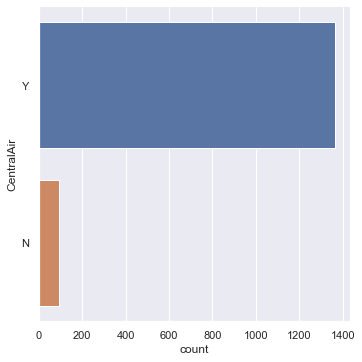

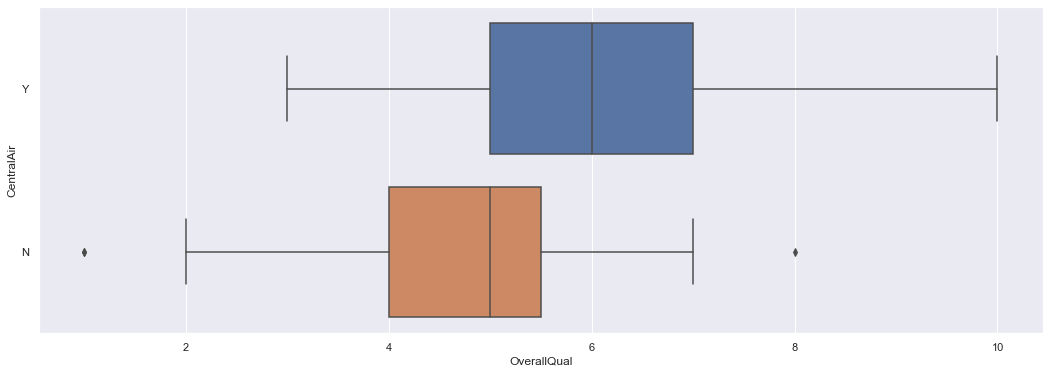

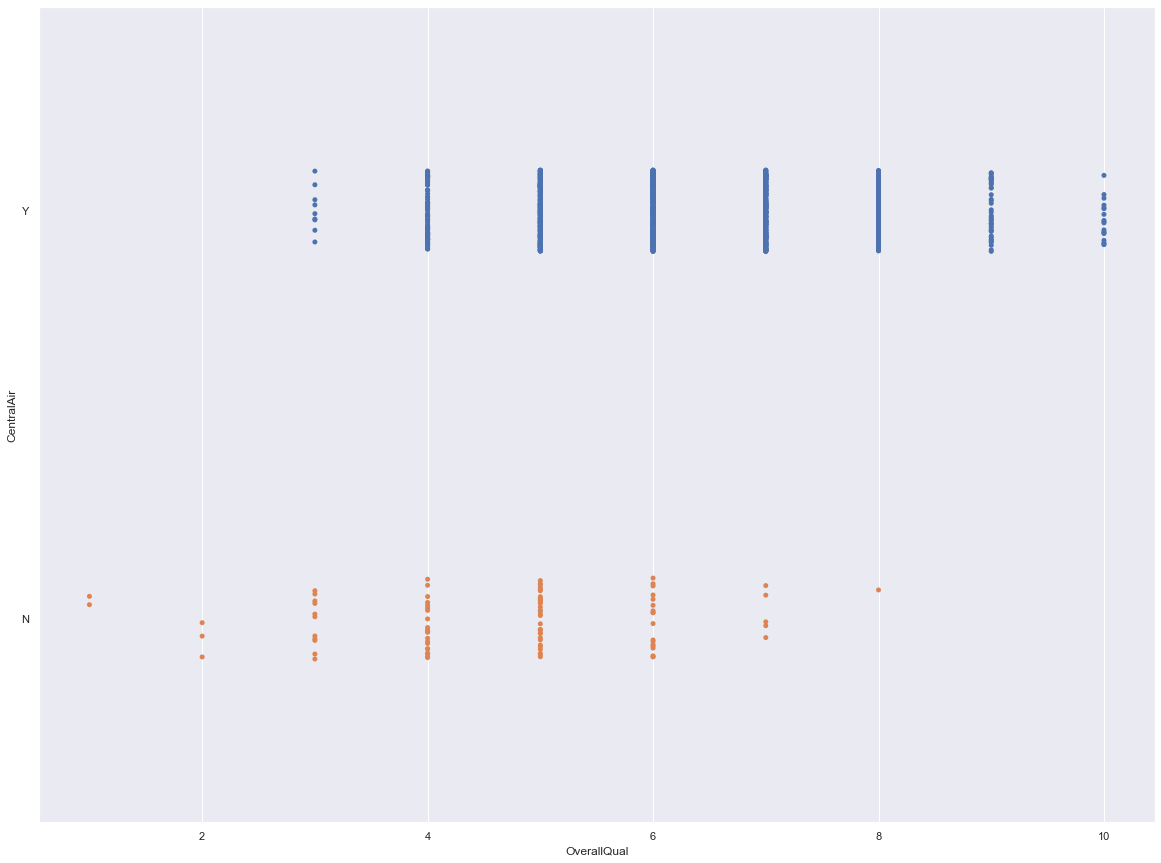

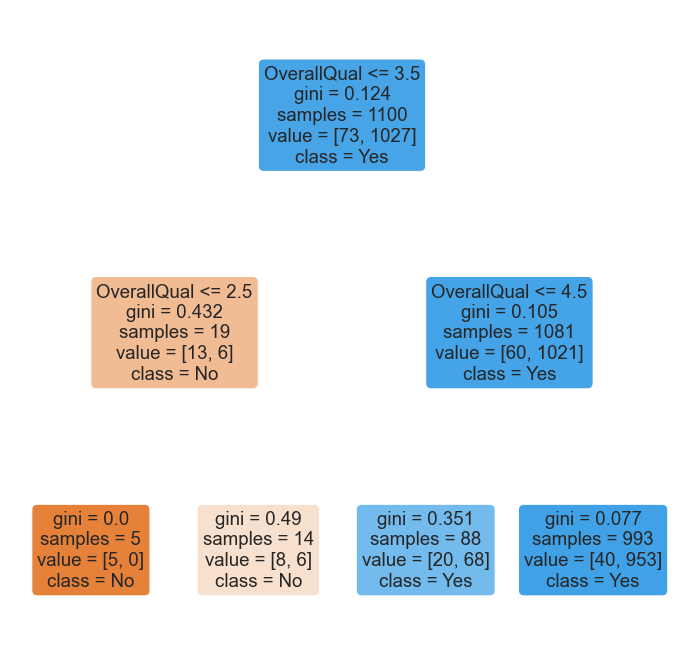

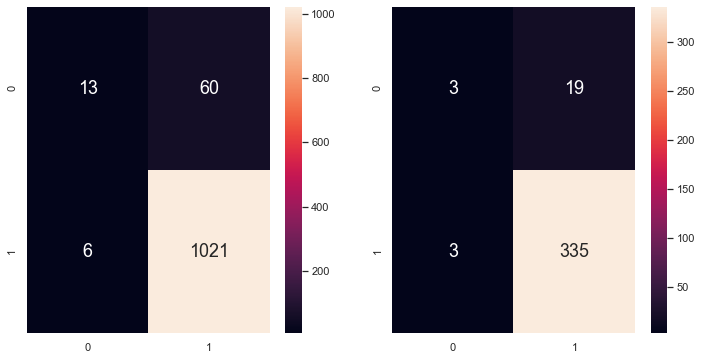

In [17]:
#a
OverallQual = pd.DataFrame(houseData['OverallQual'])
CentralAir = pd.DataFrame(houseData['CentralAir'])
cp = sb.catplot(y = "CentralAir", data = CentralAir, kind = 'count')

x = CentralAir["CentralAir"].value_counts()
print(x)
print("Ratio of the classes Y:N is " + str(x[0]) + ":" + str(x[1]))

#######################################################################################

#b
# Create a joint dataframe by concatenating Total and Legendary
target = pd.concat([OverallQual, CentralAir], axis = 1).reindex(OverallQual.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "OverallQual", y = "CentralAir", data = target, orient = "h")

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(20, 15))
sb.stripplot(x = "OverallQual", y = "CentralAir", data = target, orient = "h")

#######################################################################################

#c
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

#######################################################################################

#d
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(OverallQual, CentralAir, train_size = 1100, test_size = 360)

#######################################################################################

#e
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)

#######################################################################################

#f
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["OverallQual"], 
          class_names=["No","Yes"])

#######################################################################################

#g
# Predict CentralAir corresponding to OverallQual Train
y_train_pred = dectree.predict(X_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

#######################################################################################

#h
# Print the Classification Accuracy
print()
print("TRAIN: ")
print("Classification Accuracy\t:", dectree.score(X_train, y_train))

cm = confusion_matrix(y_train, y_train_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))
print()

#######################################################################################

#i
# Predict CentralAir corresponding to OverallQual Test
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

#######################################################################################

#j
# Print the Classification Accuracy
print()
print("TEST: ")
print("Classification Accuracy\t:", dectree.score(X_test, y_test))

cm = confusion_matrix(y_test, y_test_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))
print()

#######################################################################################

### YearBuilt

Y    1365
N      95
Name: CentralAir, dtype: int64
Ratio of the classes Y:N is 1365:95

TRAIN: 
Classification Accuracy	: 0.9336363636363636
True positive Rate     	: 1.0
False positive Rate    	: 1.0
False negative Rate    	: 0.0
True negative Rate     	: 0.0


TEST: 
Classification Accuracy	: 0.9388888888888889
True positive Rate     	: 1.0
False positive Rate    	: 1.0
False negative Rate    	: 0.0
True negative Rate     	: 0.0



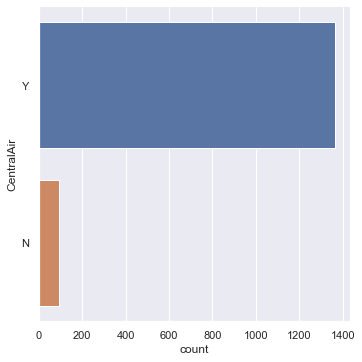

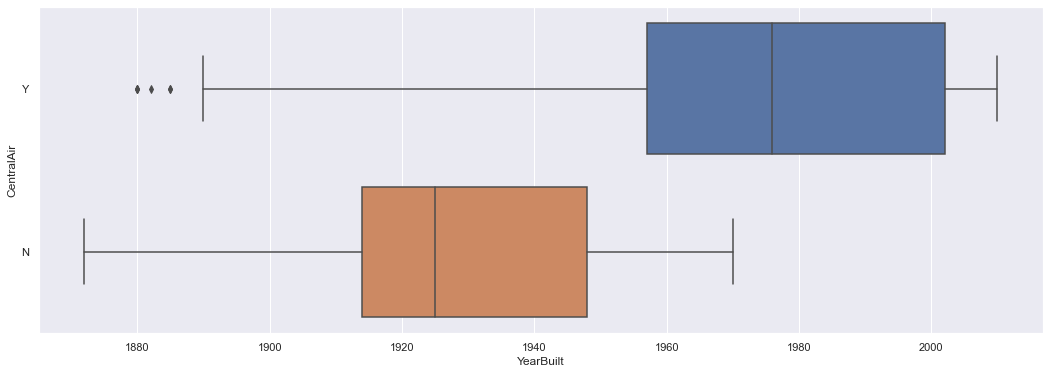

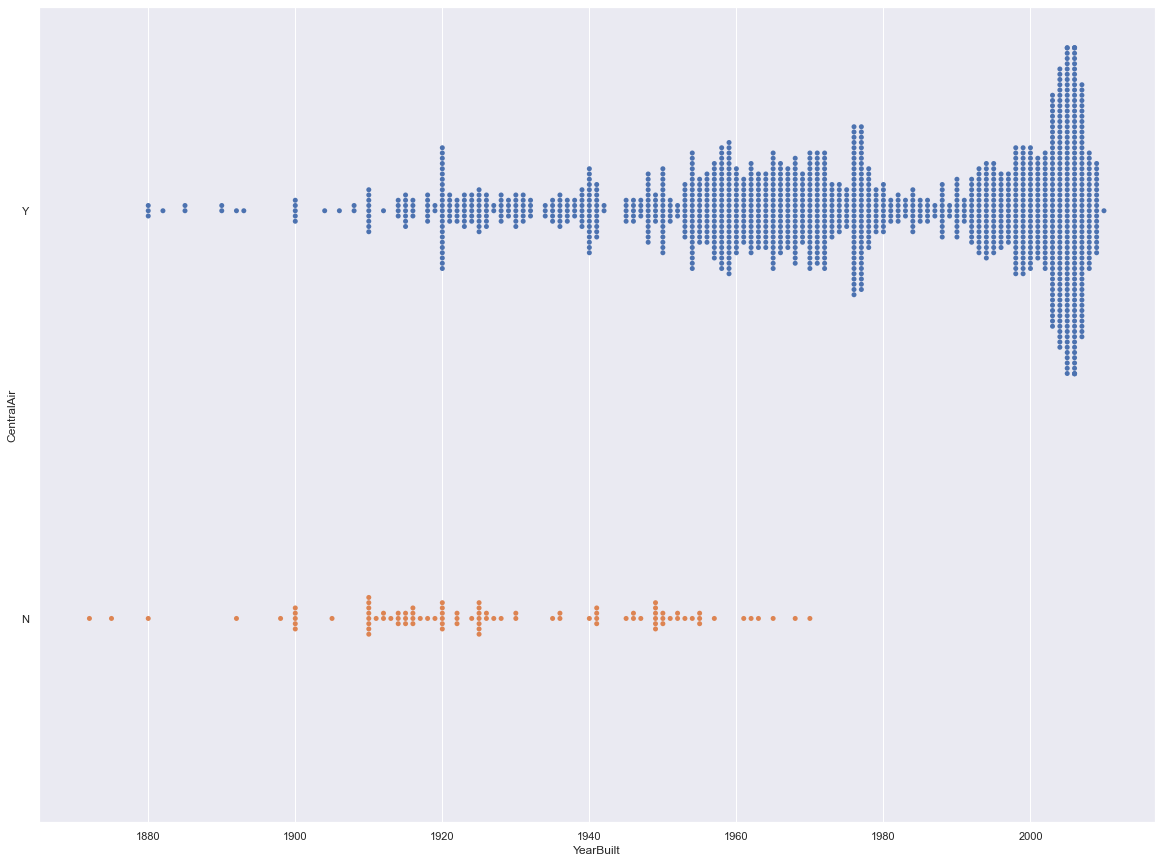

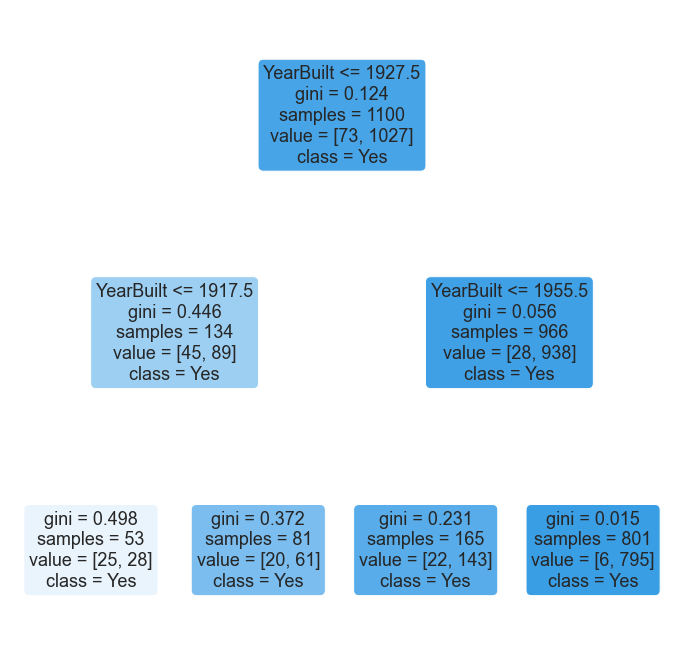

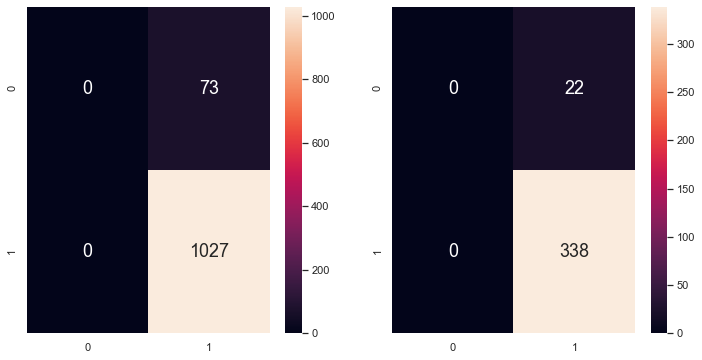

In [18]:
#a
YearBuilt = pd.DataFrame(houseData['YearBuilt'])
CentralAir = pd.DataFrame(houseData['CentralAir'])
cp = sb.catplot(y = "CentralAir", data = CentralAir, kind = 'count')

x = CentralAir["CentralAir"].value_counts()
print(x)
print("Ratio of the classes Y:N is " + str(x[0]) + ":" + str(x[1]))

#######################################################################################

#b
# Create a joint dataframe by concatenating Total and Legendary
target = pd.concat([YearBuilt, CentralAir], axis = 1).reindex(YearBuilt.index)

# Joint Boxplot of Total Train against Legendary Train
f = plt.figure(figsize=(18, 6))
sb.boxplot(x = "YearBuilt", y = "CentralAir", data = target, orient = "h")

# Joint Swarmplot of Total Train against Legendary Train
f = plt.figure(figsize=(20, 15))
sb.swarmplot(x = "YearBuilt", y = "CentralAir", data = target, orient = "h")

#######################################################################################

#c
# Import Decision Tree Classifier model from Scikit-Learn
from sklearn.tree import DecisionTreeClassifier

#######################################################################################

#d
from sklearn.model_selection import train_test_split

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(YearBuilt, CentralAir, train_size = 1100, test_size = 360)

#######################################################################################

#e
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  
dectree.fit(X_train, y_train)

#######################################################################################

#f
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(12, 12))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=["YearBuilt"], 
          class_names=["No","Yes"])

#######################################################################################

#g
# Predict CentralAir corresponding to YearBuilt Train
y_train_pred = dectree.predict(X_train)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
f, axes = plt.subplots(1, 2, figsize=(12, 6))
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

#######################################################################################

#h
# Print the Classification Accuracy
print()
print("TRAIN: ")
print("Classification Accuracy\t:", dectree.score(X_train, y_train))

cm = confusion_matrix(y_train, y_train_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))
print()

#######################################################################################

#i
# Predict CentralAir corresponding to YearBuilt Test
y_test_pred = dectree.predict(X_test)

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax=axes[1])

#######################################################################################

#j
# Print the Classification Accuracy
print()
print("TEST: ")
print("Classification Accuracy\t:", dectree.score(X_test, y_test))

cm = confusion_matrix(y_test, y_test_pred)
tp = cm[1][1]
fp = cm[0][1]
fn = cm[1][0]
tn = cm[0][0]
print('True positive Rate     \t:', tp/(fn+tp))
print('False positive Rate    \t:', fp/(fp+tn))
print('False negative Rate    \t:', fn/(fn+tp))
print('True negative Rate     \t:', tn/(tn+fp))
print()

#######################################################################################

### Problem 3 : Best Uni-Variate Model to Predict CentralAir
Compare and contrast the four models in terms of Classification Accuracy, True Positive Rate and False Positive Rate on
both Train and Test Data to comment on which univariate classification tree you think is the best to predict “CentralAir”.

Below is the results from one of the random sets.
### Saleprice
TRAIN:<br>
Classification Accuracy	: 0.9427272727272727 <br> 
True positive Rate     	: 0.9990291262135922 <br>
False positive Rate    	: 0.8857142857142857 <br>
False negative Rate    	: 0.000970873786407767 <br>
True negative Rate     	: 0.11428571428571428 <br>

TEST:<br>
Classification Accuracy	: 0.9361111111111111<br>
True positive Rate     	: 1.0<br>
False positive Rate    	: 0.92<br>
False negative Rate    	: 0.0<br>
True negative Rate     	: 0.08<br>

### GrLivArea
TRAIN: <br>
Classification Accuracy	:0.939<br>
True positive Rate     	: 1.0<br>
False positive Rate    	: 0.9436619718309859<br>
False negative Rate    	: 0.0<br>
True negative Rate     	: 0.056338028169014086<br>


TEST: <br>
Classification Accuracy	:0.933<br>
True positive Rate     	: 1.0<br>
False positive Rate    	: 1.0<br>
False negative Rate    	: 0.0<br>
True negative Rate     	: 0.0<br>



### OverallQual
TRAIN: <br>
Classification Accuracy	: 0.9463636363636364<br>
True positive Rate     	: 0.995164410058027<br>
False positive Rate    	: 0.8181818181818182<br>
False negative Rate    	: 0.004835589941972921<br>
True negative Rate     	: 0.18181818181818182<br>


TEST: <br>
Classification Accuracy	: 0.9194444444444444<br>
True positive Rate     	: 0.9879154078549849<br>
False positive Rate    	: 0.8620689655172413<br>
False negative Rate    	: 0.012084592145015106<br>
True negative Rate     	: 0.13793103448275862<br>


### YearBuilt
TRAIN: <br>
Classification Accuracy	: 0.9381818181818182<br>
True positive Rate     	: 1.0<br>
False positive Rate    	: 1.0<br>
False negative Rate    	: 0.0<br>
True negative Rate     	: 0.0<br>


TEST: <br>
Classification Accuracy	: 0.925<br>
True positive Rate     	: 1.0<br>
False positive Rate    	: 1.0<br>
False negative Rate    	: 0.0<br>
True negative Rate     	: 0.0<br>


**I would choose OverallQual model to predict CentralAir. Comparing with other model's rate, the true positive is relatively highest and false positive is relatively lowest (both train and test data). <br>
This means that it predicts more correct "True" labels and less incorrect "True" labels. Intuitively, it is best to predict most of the "True" as "True". However, we must also consider that it would cause more damage to predict a "False" as a "True" when predicting the CentralAir, just like what it did in the YearBuilt and GrLivArea model.**